# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [33]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)



In [34]:
# view city data df
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [35]:
# view ride data df

ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12


### Merge the DataFrames

In [36]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [37]:
#  1. Get the total rides for each city type

total_rides=pyber_data_df.groupby(["type"]).count()["ride_id"]

total_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [38]:
# 2. Get the total drivers for each city type

total_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]

total_drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [39]:
#  3. Get the total amount of fares for each city type

total_fares=pyber_data_df.groupby(["type"]).sum()["fare"]

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [40]:
#  4. Get the average fare per ride for each city type. 

avgfare_per_ride=pyber_data_df.groupby(["type"]).mean()["fare"]

avgfare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [41]:
# 5. Get the average fare per driver for each city type. 

avgfare_per_driver=total_fares/total_drivers
avgfare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [42]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df=pd.DataFrame(
    {"Total Rides": total_rides,
     "Total Drivers" : total_drivers,
     "Total Fares" : total_fares,
     "Average Fare per Ride" : avgfare_per_ride,
     "Average Fare per Driver" : avgfare_per_driver, 
    })

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [43]:
#  7. Cleaning up the DataFrame. Delete the index name

pyber_summary_df.index.name = None

In [47]:
#  8. Format the columns.

#int64 is now object? Can not get DF to display, receive "ValueError: Cannot specify ',' with 's'." error. Thinks data is now string? 

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

ValueError: Unknown format code 'f' for object of type 'str'

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [49]:
# 1. Read the merged DataFrame

pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12,33,Urban


In [56]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_pyber_data_df=pyber_data_df.groupby(["type","date"]).sum(["fare"])

sum_pyber_data_df



fare       ride_id  driver_count
type  date                                            
Rural 1/1/19 9:45    43.69  2.424880e+12             1
      1/11/19 4:39   16.42  8.800560e+12             6
      1/14/19 15:58  54.10  4.329260e+11             6
      1/14/19 7:09   18.05  5.405360e+12             1
      1/15/19 21:44  30.26  3.837060e+12             1
...                    ...           ...           ...
Urban 5/8/19 1:54    32.69  1.643410e+12            25
      5/8/19 2:31    41.33  5.688920e+12             4
      5/8/19 4:20    21.99  1.179980e+11            52
      5/8/19 4:39    18.45  1.811570e+12            11
      5/8/19 7:29    18.55  5.682020e+12            33

[2364 rows x 3 columns]

In [57]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

sum_pyber_data_df=sum_pyber_data_df.reset_index()
sum_pyber_data_df



,type,date,fare,ride_id,driver_count
0,Rural,1/1/19 9:45,43.69,2.424880e+12,1
1,Rural,1/11/19 4:39,16.42,8.800560e+12,6
2,Rural,1/14/19 15:58,54.10,4.329260e+11,6
3,Rural,1/14/19 7:09,18.05,5.405360e+12,1
4,Rural,1/15/19 21:44,30.26,3.837060e+12,1
...,...,...,...,...,...
2359,Urban,5/8/19 1:54,32.69,1.643410e+12,25
2360,Urban,5/8/19 2:31,41.33,5.688920e+12,4
2361,Urban,5/8/19 4:20,21.99,1.179980e+11,52
2362,Urban,5/8/19 4:39,18.45,1.811570e+12,11


In [58]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

totalfares_pivot_df=sum_pyber_data_df.pivot(index ="date", columns ="type", values ="fare")

totalfares_pivot_df


type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
5/8/19 1:54,NaN,NaN,32.69
5/8/19 2:31,NaN,NaN,41.33
5/8/19 4:20,NaN,NaN,21.99


In [65]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

given_dates_df = totalfares_pivot_df.loc['1/1/19':'4/29/19']

given_dates_df

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
4/28/19 4:34,NaN,NaN,40.46
4/28/19 8:15,NaN,NaN,22.86
4/28/19 9:03,NaN,NaN,15.00


In [66]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

given_dates_df.index=pd.to_datetime(given_dates_df.index)
given_dates_df.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               '2019-01-01 17:22:00', '2019-01-01 21:04:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               ...
               '2019-04-28 17:38:00', '2019-04-28 19:35:00',
               '2019-04-28 02:38:00', '2019-04-28 04:00:00',
               '2019-04-28 04:21:00', '2019-04-28 04:34:00',
               '2019-04-28 08:15:00', '2019-04-28 09:03:00',
               '2019-04-28 09:10:00', '2019-04-28 09:25:00'],
              dtype='datetime64[ns]', name='date', length=2057, freq=None)

In [67]:
# 7. Check that the datatype for the index is datetime using df.info()

given_dates_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [70]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

given_dates_week_df=given_dates_df.resample('W').sum()

given_dates_week_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


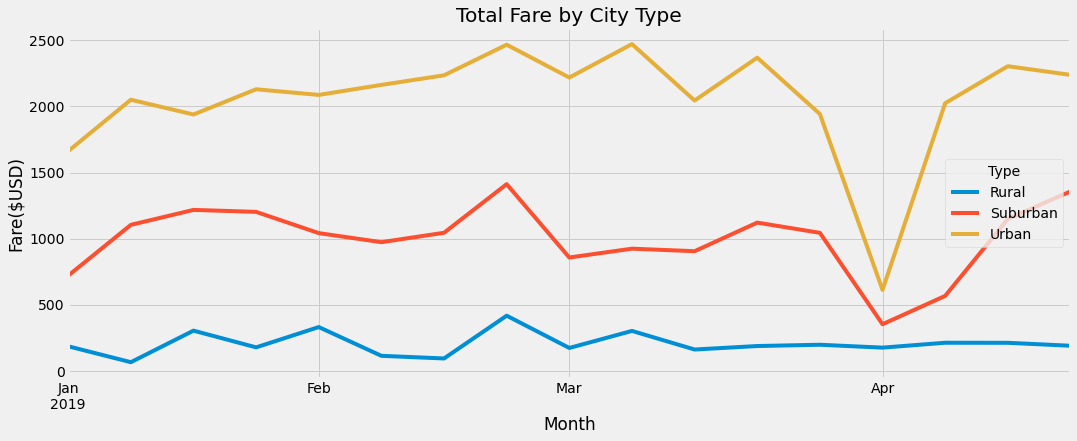

In [81]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_fares_by_city=given_dates_week_df.plot(figsize=(16,6))
weekly_fares_by_city.set_xlabel("Month")
weekly_fares_by_city.set_ylabel("Fare($USD)")
weekly_fares_by_city.set_title("Total Fare by City Type")
weekly_fares_by_city.legend(title="Type", loc='right')

plt.savefig("Analysis/pyber_fare_summary.png")

